# Tema 6: Random Forest

Random Forest (RF) es un algoritmo de aprendizaje automático supervisado que se basa en el ensemble learning. Ensemble learning son métodos que combinan múltiples modelos de machine learning para crear modelos más potentes.

Para realizar esta combinación de modelos existen dos técnicas:
* **Bagging**: métodos donde los algoritmos simples se usan en paralelo.
* **Boosting**: los modelos simples son utilizados secuencialmente, es decir, cada modelo simple va delante o detrás de otro modelo simple.

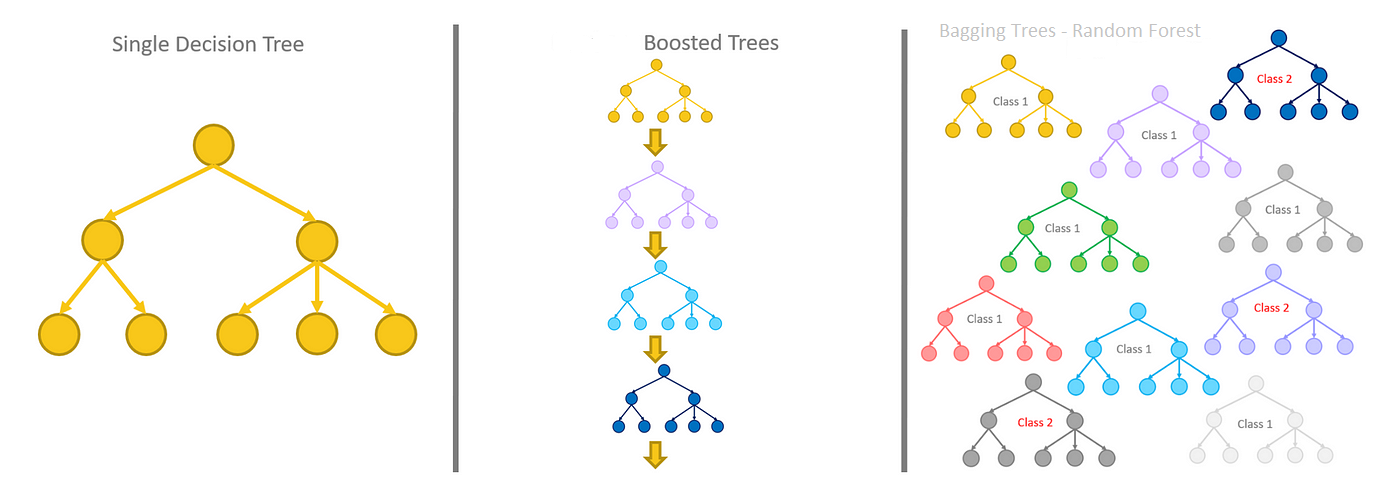

En el caso de RF, crea árboles de decisión para las muestras de datos dadas, obtiene predicciones de cada árbol y selecciona la mejor solución mediante votación.

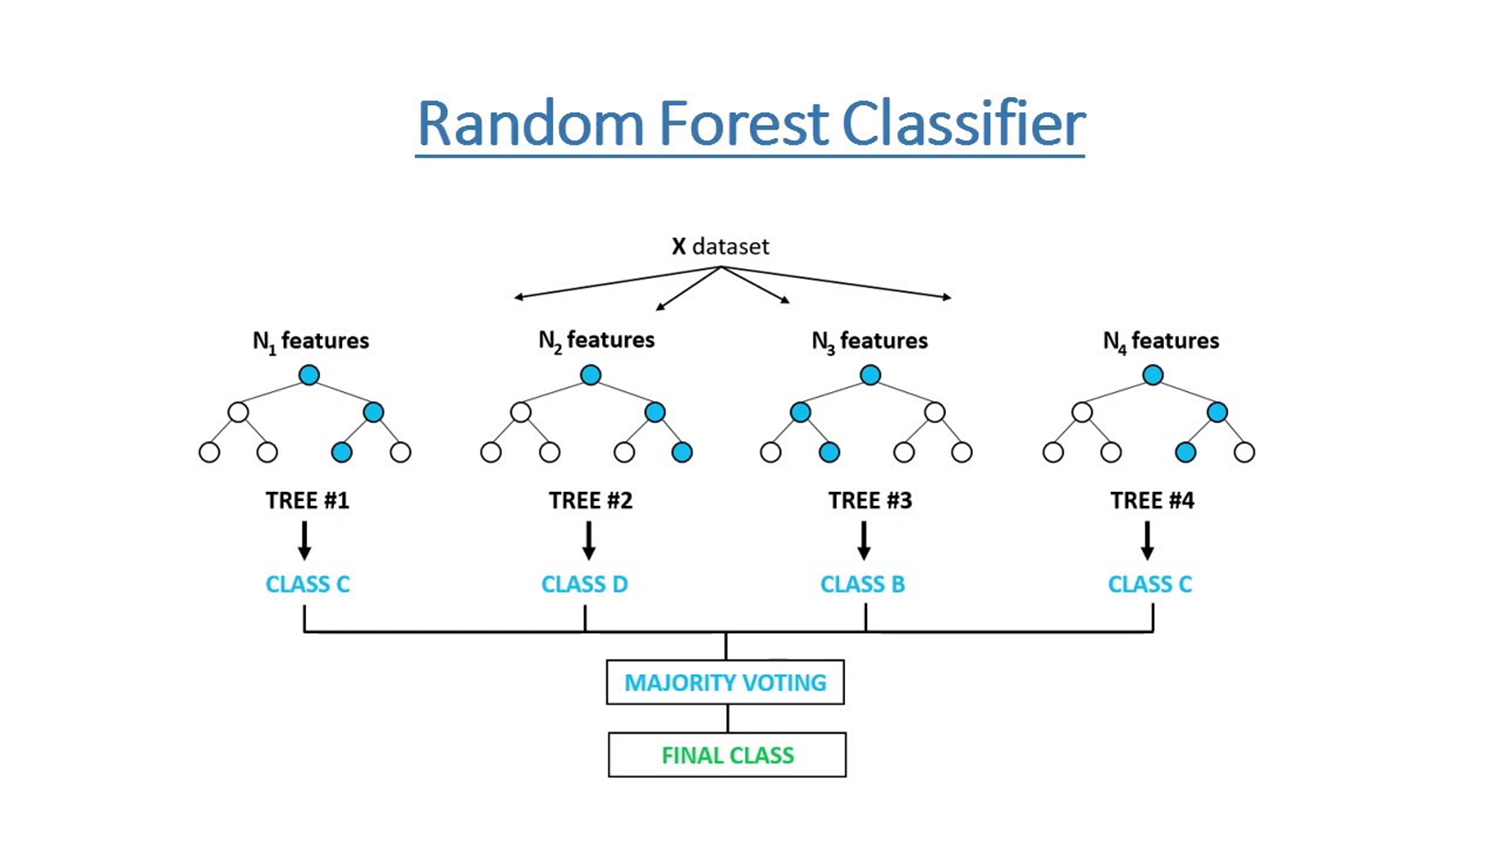

RF combina múltiples árboles de decisión, lo que da como resultado un bosque de árboles, de ahí el nombre de Random Forest.

## Idea intuitiva

La intuición del algoritmo de RF se puede dividir en dos etapas.

**En la primera etapa**, seleccionamos aleatoriamente `k` características de un total de `m` características y construimos el bosque aleatorio. En la primera etapa, procedemos de la siguiente manera:
1. Seleccionar aleatoriamente `k` características de un total de `m` características donde `k < m`.
2. Entre las características `k`, calcule el nodo `d` utilizando el mejor punto de división.
3. Dividir el nodo en nodos secundarios usando la mejor división.
4. Repitir de 1 a 3 pasos hasta alcanzar el número de nodos.
5. Construir un bosque repitiendo los pasos 1 a 4 n veces para crear n árboles.


**En la segunda etapa**, hacemos predicciones utilizando el RF entrenado.

1. Tomamos las características de prueba y usamos las reglas de cada árbol de decisión creado aleatoriamente para predecir el resultado y almacenar el resultado previsto.
2. Luego, calculamos los votos para cada objetivo previsto.
3. Finalmente, consideramos el objetivo pronosticado más votado como la predicción final de RF.
























Librería se sklearn para RF: https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees


## Ventajas y desventajas de Random Forest

Las principales ventajas de RF son:

* Modelo de propósito general que funciona bien en la mayoría de los problemas.
   * El algoritmo de RF se puede utilizar para resolver problemas de clasificación y regresión.
* Se considera un modelo muy preciso y robusto porque utiliza una gran cantidad de árboles de decisión para hacer predicciones.
* RF toma el promedio de todas las predicciones hechas por los árboles de decisión, lo que cancela los sesgos. Por lo tanto, no sufre el problema des sobreajuste.
* RF trabaja bien con los valores faltantes. Hay dos formas de manejar los valores perdidos. El primero es usar valores medianos para reemplazar variables continuas y el segundo es calcular el promedio ponderado por proximidad de los valores faltantes.
* RF para clasificación se puede utilizar para la selección de características. Significa seleccionar las características más importantes de las características disponibles del conjunto de datos de entrenamiento.
* Puede gestionar datos noisy o missing y variables categóricas o continuas.
   * No necesitar escalar/normalizar datos.
* Se puede utilizar con datos que tienen un número grande de features o instancias.

Las desventajas de Random Forest son:

* La mayor desventaja de RF es su complejidad computacional. RF es muy lento para hacer predicciones porque se usa una gran cantidad de árboles de decisión para hacer predicciones. Todos los árboles en el bosque tienen que hacer una predicción para la misma entrada y luego votarla. Por lo tanto, es un proceso que requiere mucho tiempo.
* El modelo es difícil de interpretar en comparación con un árbol de decisiones, donde podemos hacer una predicción fácilmente en comparación con un árbol de decisiones.
* Puede ser necesario algo de trabajo para ajustar el modelo.
   * Ajuste de los hiperparámetros.

### Predecir la temperatura máxima del día siguiente

El problema que abordaremos es predecir la temperatura máxima para mañana en una ciudad usando un año de datos meteorológicos anteriores.

Tenemos acceso  a un año de temperaturas máximas históricas, las temperaturas de los dos días anteriores y una estimación de un amigo que siempre afirma saberlo todo sobre el clima.

**Qué tipo de tarea es**

Es ML supervisado porque tenemos tanto las características (datos de la ciudad) como los objetivos (temperatura) que queremos predecir. Durante el entrenamiento, RF tomará tanto las características como el objetivos, y debe aprender a asignar los datos a una predicción. Además, esta es una tarea de regresión porque el valor objetivo es continuo.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
# dataset para hacer predicciones de temperatura

features = pd.read_csv('temps.csv', sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'temps.csv'

In [ ]:
# EDA
features.shape

(348, 9)

In [ ]:
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


- year: 2016 porque solo tenemos registros de un año
- month: número de mes del año
- day: número de día del año
- week: día de la semana como string
- temp_2: temperatura máxima dos días antes
- temp_1: temperatura máxima un día antes
- average: temperatura máxima promedio histórica
- actual: medición de temperatura máxima
- friend: la predicción de tu amigo, un número aleatorio entre 20 por debajo del promedio y 20 por encima del promedio

In [ ]:
features.describe()


,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [ ]:
features.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

In [ ]:
for col in features.columns:
     print(features[col].value_counts()) 

2016    348
Name: year, dtype: int64
1     31
3     31
5     31
7     31
12    31
4     30
6     30
10    30
11    30
9     28
2     26
8     19
Name: month, dtype: int64
16    12
9     12
23    12
15    12
28    12
12    12
10    12
11    12
8     12
7     12
6     12
5     12
4     12
3     12
21    11
27    11
26    11
25    11
24    11
22    11
1     11
20    11
19    11
18    11
17    11
2     11
14    11
13    11
29    10
30    10
31     6
Name: day, dtype: int64
Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: week, dtype: int64
60     16
68     15
57     14
65     13
71     12
55     12
67     11
52     11
64     11
59     11
77     10
51     10
76      9
63      9
66      9
75      9
54      9
49      9
61      8
73      8
48      8
53      8
58      7
56      7
74      7
81      6
62      6
79      6
80      5
72      5
45      5
69      5
40      5
44      5
70      4
46      4
50      4
85      4
39      3
82      3
42      3
41     

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


## One-Hot Encoding

One hot encoding toma esto:

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |

y lo transforma en esto:

| Mon | Tue | Wed | Thu | Fri |
|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   | 0   |
| 0   | 0   | 1   | 0   | 0   |
| 0   | 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 0   | 1   |

In [ ]:
features = pd.get_dummies(features)

features.iloc[:,5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [ ]:
features.shape

(348, 15)

In [ ]:
import numpy as np

# target
labels = np.array(features['actual'])
features = features.drop('actual', axis = 1)

feature_list = list(features.columns)
features = np.array(features)

In [ ]:
# separamos training and test
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


Pasos que hemos tenido que realizar:
* One-hot encoded categorical variables
* Separar datos en características y equitetas
* Convertir en arrays
* Separar datos en entrenamiento y test

**Establecer un modelo base con el que comparar**


In [ ]:
# vamos a comparar con la media histórica
baseline_preds = test_features[:, feature_list.index('average')]

# Error de esta media histórica
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


**Predicciones con Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Nuestro primer modelo va a tener 1000 árboles
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
predictions = rf.predict(test_features)

In [ ]:
# Calculamos el error absoluto
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


Nuestra estimación promedio está desviada en 3,83 grados. Eso es una mejora promedio de más de 1 grado sobre la línea de base. Aunque esto puede no parecer significativo, es casi un 25% mejor que la línea de base, que, dependiendo del campo y el problema, podría representar millones de dólares para una empresa.

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.94 %.


## Cuáles son las features más importantes

Hasta ahora, hemos utilizado todas las características dadas en el modelo. Ahora, seleccionaremos solo las características importantes, realizaremos la construcción del modelo usando estas características y veremos su efecto en la precisión.

En la implementación que nos proporciona sklearn(https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) nos dice: _`feature_importances_` are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree_


In [ ]:
importances = rf.feature_importances_


In [ ]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


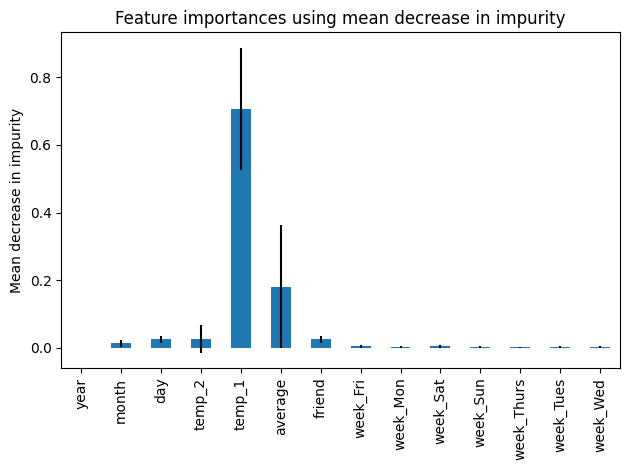

In [ ]:
forest_importances = pd.Series(importances, index=feature_list)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using mean decrease in impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

,Ingrediente,% p/p,% p/v,% v/v
0,Gelatina,2.929745,3821.656051,3.184713
1,Leche,50.196293,65477.707006,63.694268
2,Leche condensada,23.437958,30573.248408,25.477707
3,Agua,23.436005,30570.700637,30.573248
